# K-Nearest Neighbor (최근접 이웃)
### - 예측 모델없이 최근접 값들을 기준으로 분류/회귀

In [253]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [254]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

# KNN Classification

### Data 가져오기

In [255]:
a = load_wine                     
data = a()
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [256]:
df = pd.DataFrame(data=data.data, columns = data.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [257]:
df['Target'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Train, Test Data 분리하기

In [258]:
def X_y(t):
    X, y = t(return_X_y=True)
    return X, y

In [259]:
X_y(a)

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [260]:
X, y = X_y(a)

In [261]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [262]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [264]:
print("총개수 : {0}, X_train 개수 : {1}, y_train 개수 : {2}, X_test 개수 : {3}".format(len(X), len(X_train), len(y_train), len(X_test)))

총개수 : 178, X_train 개수 : 142, y_train 개수 : 142, X_test 개수 : 36


### 전처리 (standardization)

In [265]:
scaler = StandardScaler()

In [266]:
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

### Model 적용

In [267]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print("학습 데이터 점수 : {:2f}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {:2f}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.746479
평가 데이터 점수 : 0.750000


In [268]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)
print("학습 데이터 점수 : {:.2f}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수 : {:.2f}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수 : 0.96
평가 데이터 점수 : 1.00


### Cross Validate 검증

In [269]:
estimator = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [270]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    4.3s remaining:    2.8s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    4.4s finished


{'fit_time': array([0.00300241, 0.00300241, 0.00300241, 0.00300241, 0.00596833,
        0.00300241, 0.00300241, 0.00300241, 0.0059967 , 0.00500417]),
 'score_time': array([0.00299096, 0.00299096, 0.00499535, 0.02899766, 0.00400043,
        0.00299096, 0.00401282, 0.00699568, 0.0060041 , 0.0059917 ]),
 'test_score': array([1.        , 0.94444444, 0.94444444, 0.94444444, 1.        ,
        0.94444444, 1.        , 1.        , 0.94117647, 0.94117647])}

### 최적화 조건 검토

In [271]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsClassifier())])

In [272]:
param_grid = [{'model__n_neighbors':[3, 5, 7],
              'model__weights':['uniform', 'distance'],
              'model__algorithm':['ball_tree', 'kd_tree', 'brute']}]

In [273]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True)

In [274]:
gs.fit(X, y)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  90 out of  90 | elapsed:    0.1s finished


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=8,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [275]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [276]:
print("GridSearchCF best score : {:.4f}".format(gs.best_score_))

GridSearchCF best score : 0.9665


### 시각화

In [277]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    return xx, yy

def plot_contour(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [278]:
tsne = TSNE(n_components=2)   # 시각화를 위해 저차원(2차원)으로 변환
X_comp = tsne.fit_transform(X)

In [279]:
X_comp

array([[ 10.601383  ,   5.1813064 ],
       [  9.888992  ,   5.5430126 ],
       [ 12.161909  ,   6.823095  ],
       [ 14.588668  ,   8.390103  ],
       [  3.3000004 ,   0.22785768],
       [ 14.430096  ,   8.301705  ],
       [ 13.552006  ,   7.4356823 ],
       [ 13.616095  ,   7.4863005 ],
       [  9.778392  ,   5.4717374 ],
       [ 10.194417  ,   4.95187   ],
       [ 14.517287  ,   8.73196   ],
       [ 13.014361  ,   7.85035   ],
       [ 13.552045  ,   8.063195  ],
       [ 11.657178  ,   6.4451222 ],
       [ 14.75661   ,   8.683588  ],
       [ 13.701956  ,   7.705747  ],
       [ 13.48069   ,   7.289735  ],
       [ 11.379491  ,   6.1626863 ],
       [ 14.9250345 ,   8.890252  ],
       [  5.8956294 ,   2.446769  ],
       [  4.4770794 ,   1.1422768 ],
       [  4.024019  ,   1.1301935 ],
       [  9.943419  ,   4.8666887 ],
       [  9.560618  ,   4.751924  ],
       [  6.168563  ,   2.1229236 ],
       [  5.5544763 ,   2.0827818 ],
       [ 12.315606  ,   6.918685  ],
 

In [280]:
X_comp[:,0]

array([ 10.601383  ,   9.888992  ,  12.161909  ,  14.588668  ,
         3.3000004 ,  14.430096  ,  13.552006  ,  13.616095  ,
         9.778392  ,  10.194417  ,  14.517287  ,  13.014361  ,
        13.552045  ,  11.657178  ,  14.75661   ,  13.701956  ,
        13.48069   ,  11.379491  ,  14.9250345 ,   5.8956294 ,
         4.4770794 ,   4.024019  ,   9.943419  ,   9.560618  ,
         6.168563  ,   5.5544763 ,  12.315606  ,  13.074459  ,
         7.293644  ,   9.607525  ,  13.098622  ,  14.563455  ,
         9.101746  ,  12.786629  ,  10.945567  ,   7.395246  ,
         6.5661445 ,  10.849916  ,   9.432362  ,   4.045016  ,
         4.8249173 ,   9.983488  ,  10.9379015 ,   0.9799231 ,
         6.7094    ,  10.450103  ,  10.264481  ,   9.009442  ,
        10.460396  ,  12.825895  ,  11.657361  ,  13.176706  ,
        12.262182  ,  13.913897  ,  10.082012  ,  11.163917  ,
         8.61045   ,  13.277732  ,  13.115194  ,  -5.9246416 ,
         1.0238554 ,  -9.403954  ,  -1.1146072 , -10.44

In [281]:
X_comp[:,1]

array([  5.1813064 ,   5.5430126 ,   6.823095  ,   8.390103  ,
         0.22785768,   8.301705  ,   7.4356823 ,   7.4863005 ,
         5.4717374 ,   4.95187   ,   8.73196   ,   7.85035   ,
         8.063195  ,   6.4451222 ,   8.683588  ,   7.705747  ,
         7.289735  ,   6.1626863 ,   8.890252  ,   2.446769  ,
         1.1422768 ,   1.1301935 ,   4.8666887 ,   4.751924  ,
         2.1229236 ,   2.0827818 ,   6.918685  ,   7.956038  ,
         3.2538664 ,   5.3038335 ,   7.9342923 ,   8.717065  ,
         4.555696  ,   7.177016  ,   5.646489  ,   3.3229148 ,
         2.88249   ,   6.1010156 ,   5.036208  ,   0.7100894 ,
         1.5179008 ,   4.823844  ,   5.6528    ,  -0.7511776 ,
         2.8990767 ,   5.8598523 ,   5.6611967 ,   4.4995804 ,
         5.177653  ,   7.575792  ,   6.4439554 ,   7.245313  ,
         6.841916  ,   8.217209  ,   5.7214074 ,   6.13809   ,
         4.224345  ,   7.243153  ,   7.917037  ,  -6.925664  ,
        -0.8296711 ,  -9.086494  ,  -2.1954308 , -10.14

In [282]:
comp_df = pd.DataFrame(data=X_comp)
comp_df["Target"] = y
comp_df

,0,1,Target
0,10.601383,5.181306,0
1,9.888992,5.543013,0
2,12.161909,6.823095,0
3,14.588668,8.390103,0
4,3.300000,0.227858,0
...,...,...,...
173,3.040482,0.563129,2
174,3.419903,0.790744,2
175,5.771559,2.068617,2
176,5.753203,2.383790,2


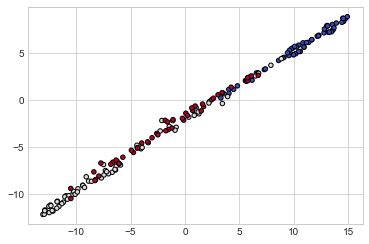

In [283]:
## 단순 시각화
plt.scatter(X_comp[:,0], X_comp[:,1],
           c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [284]:
## KNN을 통한 시각화

model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

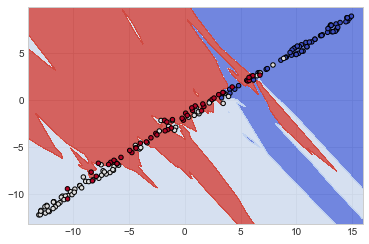

In [285]:
xx, yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contour(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');